In [13]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from matplotlib import pyplot as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
train_df = pd.read_csv('../dump/train_modified.csv')
test_df = pd.read_csv('../dump/test_modified.csv')
target='acc_now_delinq'
IDcol = 'member_id'
predictors = [x for x in train_df.columns if x not in [target,IDcol]]
train_df[target].value_counts()

0.0    697707
1.0      3258
Name: acc_now_delinq, dtype: int64

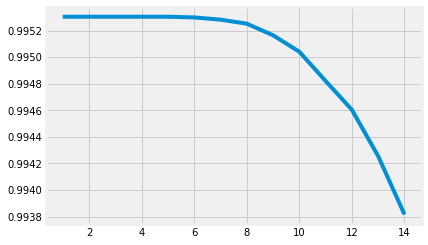

In [14]:
X_train,X_test, Y_train, Y_test = train_test_split(train_df[predictors],train_df[target],test_size=0.15)
best_model = []

for i in range(1,15):
    model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)    
    kfold = StratifiedKFold(n_splits= 5, shuffle = True)
    scores = cross_val_score(model, X_train, Y_train, cv = kfold, n_jobs = -1)
    best_model.append(scores.mean())

plt.plot(range(1,15),best_model)
plt.show()

In [15]:
param_dist = {    "max_depth": sp_randint(6,10),
                  "max_features": sp_randint(3,15),
                  "max_leaf_nodes": [10,20,30,40,50],
                  "min_samples_leaf": [25,50,75,100,150,250,500],
                 }
random_search = RandomizedSearchCV(model,
                        param_distributions=param_dist,
                        n_iter=50)

random_search.fit(X_train, Y_train)
print(random_search.best_score_)
print(random_search.best_estimator_)

0.9953039508576416
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=14, max_leaf_nodes=10, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=500,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [17]:
dtrain_predictions=random_search.predict(X_test)

In [19]:
print(metrics.classification_report(Y_test, dtrain_predictions))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    104685
        1.0       0.00      0.00      0.00       460

avg / total       0.99      1.00      0.99    105145



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
